In [1]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm


In [2]:
#| echo: false
from IPython.display import display
pd.options.display.notebook_repr_html = False

In [3]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

# Transforming I
## A

In [ ]:
# 1. Had an arrival delay of two or more hours
# Load the nycflight13 dataset
flights = sm.datasets.get_rdataset("flights", "nycflights13").data.drop(columns="time_hour")

In [5]:
flights.query('arr_delay > 120').head(3)

     year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
119  2013      1    1    811.00             630     101.00   1047.00  \
151  2013      1    1    848.00            1835     853.00   1001.00   
218  2013      1    1    957.00             733     144.00   1056.00   

     sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
119             830     137.00      MQ    4576  N531MQ    LGA  CLT    118.00  \
151            1950     851.00      MQ    3944  N942MQ    JFK  BWI     41.00   
218             853     123.00      UA     856  N534UA    EWR  BOS     37.00   

     distance  hour  minute  
119       544     6      30  
151       184    18      35  
218       200     7      33  

In [6]:
# 2. Flew to Houston (IAH or HOU)
flights.query('dest == "IAH" | dest == "HOU"').head(3)

    year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
0   2013      1    1    517.00             515       2.00    830.00  \
1   2013      1    1    533.00             529       4.00    850.00   
32  2013      1    1    623.00             627      -4.00    933.00   

    sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
0              819      11.00      UA    1545  N14228    EWR  IAH    227.00  \
1              830      20.00      UA    1714  N24211    LGA  IAH    227.00   
32             932       1.00      UA     496  N459UA    LGA  IAH    229.00   

    distance  hour  minute  
0       1400     5      15  
1       1416     5      29  
32      1416     6      27  

In [7]:
# 3. Departed in summer (July, August, and September)
flights.query('month in [7, 8, 9]').head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
250450  2013      7    1      1.00            2029     212.00    236.00  \
250451  2013      7    1      2.00            2359       3.00    344.00   
250452  2013      7    1     29.00            2245     104.00    151.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
250450            2359     157.00      B6     915  N653JB    JFK  SFO  \
250451             344       0.00      B6    1503  N805JB    JFK  SJU   
250452               1     110.00      B6     234  N348JB    JFK  BTV   

        air_time  distance  hour  minute  
250450    315.00      2586    20      29  
250451    200.00      1598    23      59  
250452     66.00       266    22      45  

In [8]:
# 4. Arrived more than two hours late, but didn’t leave late
flights.query('arr_delay > 120 & dep_delay <= 0').head(3)

       year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
22911  2013      1   27   1419.00            1420      -1.00   1754.00  \
33011  2013     10    7   1350.00            1350       0.00   1736.00   
33019  2013     10    7   1357.00            1359      -2.00   1858.00   

       sched_arr_time  arr_delay carrier  flight tailnum origin dest   
22911            1550     124.00      MQ    3728  N1EAMQ    EWR  ORD  \
33011            1526     130.00      EV    5181  N611QX    LGA  MSN   
33019            1654     124.00      AA    1151  N3CMAA    LGA  DFW   

       air_time  distance  hour  minute  
22911    135.00       719    14      20  
33011    117.00       812    13      50  
33019    192.00      1389    13      59  

In [9]:
# 5. Were delayed by at least an hour, but made up over 30 minutes in flight
flights.query('dep_delay > 60 & arr_delay - dep_delay < -30').head(5)

      year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
815   2013      1    1   2205.00            1720     285.00     46.00  \
832   2013      1    1   2326.00            2130     116.00    131.00   
2286  2013      1    3   1503.00            1221     162.00   1803.00   
2508  2013      1    3   1839.00            1700      99.00   2056.00   
2522  2013      1    3   1850.00            1745      65.00   2148.00   

      sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
815             2040     246.00      AA    1999  N5DNAA    EWR  MIA    146.00  \
832               18      73.00      B6     199  N594JB    JFK  LAS    290.00   
2286            1555     128.00      UA     551  N835UA    EWR  SFO    320.00   
2508            1950      66.00      AA     575  N631AA    JFK  EGE    239.00   
2522            2120      28.00      AA     177  N332AA    JFK  SFO    314.00   

      distance  hour  minute  
815       1085    17      20  
832       22

In [10]:
# 6. Departed between midnight and 6am (inclusive)
flights.query('dep_time >= 0 & dep_time <= 600').head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
0  2013      1    1    517.00             515       2.00    830.00  \
1  2013      1    1    533.00             529       4.00    850.00   
2  2013      1    1    542.00             540       2.00    923.00   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
0             819      11.00      UA    1545  N14228    EWR  IAH    227.00  \
1             830      20.00      UA    1714  N24211    LGA  IAH    227.00   
2             850      33.00      AA    1141  N619AA    JFK  MIA    160.00   

   distance  hour  minute  
0      1400     5      15  
1      1416     5      29  
2      1089     5      40  

In [11]:
# 7. Find the fastest flights.
(
    flights.assign(speed=flights.distance / flights.air_time)
    .sort_values(by="speed", ascending=False)
    .head(3)
)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
216447  2013      5   25   1709.00            1700       9.00   1923.00  \
251999  2013      7    2   1558.00            1513      45.00   1745.00   
205388  2013      5   13   2040.00            2025      15.00   2225.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
216447            1937     -14.00      DL    1499  N666DN    LGA  ATL  \
251999            1719      26.00      EV    4667  N17196    EWR  MSP   
205388            2226      -1.00      EV    4292  N14568    EWR  GSP   

        air_time  distance  hour  minute  speed  
216447     65.00       762    17       0  11.72  
251999     93.00      1008    15      13  10.84  
205388     55.00       594    20      25  10.80  

In [7]:
# 8. Sort flights to find the most delayed flights. Find the flights that left earliest.
flights.sort_values(by="dep_delay", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
7072    2013      1    9    641.00             900    1301.00   1242.00  \
235778  2013      6   15   1432.00            1935    1137.00   1607.00   
8239    2013      1   10   1121.00            1635    1126.00   1239.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
7072              1530    1272.00      HA      51  N384HA    JFK  HNL  \
235778            2120    1127.00      MQ    3535  N504MQ    JFK  CMH   
8239              1810    1109.00      MQ    3695  N517MQ    EWR  ORD   

        air_time  distance  hour  minute  
7072      640.00      4983     9       0  
235778     74.00       483    19      35  
8239      111.00       719    16      35  

In [8]:
flights.sort_values(by="dep_delay", ascending=True).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
89673   2013     12    7   2040.00            2123     -43.00     40.00  \
113633  2013      2    3   2022.00            2055     -33.00   2240.00   
64501   2013     11   10   1408.00            1440     -32.00   1549.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
89673             2352      48.00      B6      97  N592JB    JFK  DEN  \
113633            2338     -58.00      DL    1715  N612DL    LGA  MSY   
64501             1559     -10.00      EV    5713  N825AS    LGA  IAD   

        air_time  distance  hour  minute  
89673     265.00      1626    21      23  
113633    162.00      1183    20      55  
64501      52.00       229    14      40  

In [14]:
# 9. Which flights travelled the farthest? 
flights.sort_values(by="distance", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
50676   2013     10   26   1004.00            1000       4.00   1435.00  \
108078  2013     12   28    933.00             930       3.00   1520.00   
100067  2013     12   19    924.00             930      -6.00   1450.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
50676             1450     -15.00      HA      51  N386HA    JFK  HNL  \
108078            1535     -15.00      HA      51  N384HA    JFK  HNL   
100067            1535     -45.00      HA      51  N386HA    JFK  HNL   

        air_time  distance  hour  minute  
50676     608.00      4983    10       0  
108078    633.00      4983     9      30  
100067    609.00      4983     9      30  

In [15]:
# Which travelled the shortest?
flights.sort_values(by="distance", ascending=True).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
275945  2013      7   27       NaN             106        NaN       NaN  \
3083    2013      1    4   1240.00            1200      40.00   1333.00   
16328   2013      1   19   1617.00            1617       0.00   1722.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
275945             245        NaN      US    1632     NaN    EWR  LGA  \
3083              1306      27.00      EV    4193  N14972    EWR  PHL   
16328             1722       0.00      EV    4616  N12540    EWR  PHL   

        air_time  distance  hour  minute  
275945       NaN        17     1       6  
3083       30.00        80    12       0  
16328      34.00        80    16      17  

In [16]:
# 10. 각 도착지로 출항하는 항공편이 1년 중 몇 일 있는가?
flights.groupby("dest").size()

dest
ABQ     254
ACK     265
ALB     439
       ... 
TVC     101
TYS     631
XNA    1036
Length: 105, dtype: int64

In [17]:
# 11. 1년 중 300일 이상 출항하는 도착지들을 구하면?
flights.groupby("dest").size().reset_index(name="count").query('count >= 300')
# 또는
flights.value_counts("dest").reset_index().query('count >= 300')

   dest  count
0   ORD  17283
1   ATL  17215
2   LAX  16174
..  ...    ...
79  SJC    329
80  TUL    315
81  OAK    312

[82 rows x 2 columns]

## B.

### 1.

In [18]:
# 1. Our definition of cancelled flights (dep_delay or arr_delay is missing) is slightly suboptimal. Why? Which is the most important column?
#예를 들어, 출발지연은 missing이 아니나 도착지연은 missing인 것이 있음
flights.query('dep_delay.isna() & ~arr_delay.isna()')[["dep_time", "arr_time", "dep_delay", "arr_delay"]]

Empty DataFrame
Columns: [dep_time, arr_time, dep_delay, arr_delay]
Index: []

In [19]:
flights.query('~dep_delay.isna() & arr_delay.isna()')[["dep_time", "arr_time", "dep_delay", "arr_delay"]]

        dep_time  arr_time  dep_delay  arr_delay
471      1525.00   1934.00      -5.00        NaN
477      1528.00   2002.00      29.00        NaN
615      1740.00   2158.00      -5.00        NaN
...          ...       ...        ...        ...
334495   1214.00   1801.00     -11.00        NaN
335534   1734.00   2159.00      23.00        NaN
335805    559.00       NaN      -1.00        NaN

[1175 rows x 4 columns]

출발지연이 misssing이면 도착지연도 missing
출발지연은 missing이 아니나 도작지연은 missing인 것이 있음: 어떤 뜻인가?
따라서 arr_delay(도착지연)가 missing인 것이 결항된 항공편이라고 볼 수 없음
실제로는 도착지연이 더 중요한 지표임, 연결된 항공편을 놓칠 수 있기 때문에. 출발지연은 오히려 좋을 수도..


### 2.

In [20]:
# 2. Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the (daily) average delay?
# 취소되는 항공편들이 많은 것과 관계 있는 것은 무엇이 있을까…

In [21]:
# 출항한 항공편이 많을수록 결항편도 많음.. 당연? 선형관계?  >> 결항 비율로
cancelled_per_day = (
    flights.assign(
        cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna())
    .groupby(["month", "day"])["cancelled"]
    .agg(["sum", "count"])
)
cancelled_per_day.head(3)

           sum  count
month day            
1     1     11    842
      2     15    943
      3     14    914

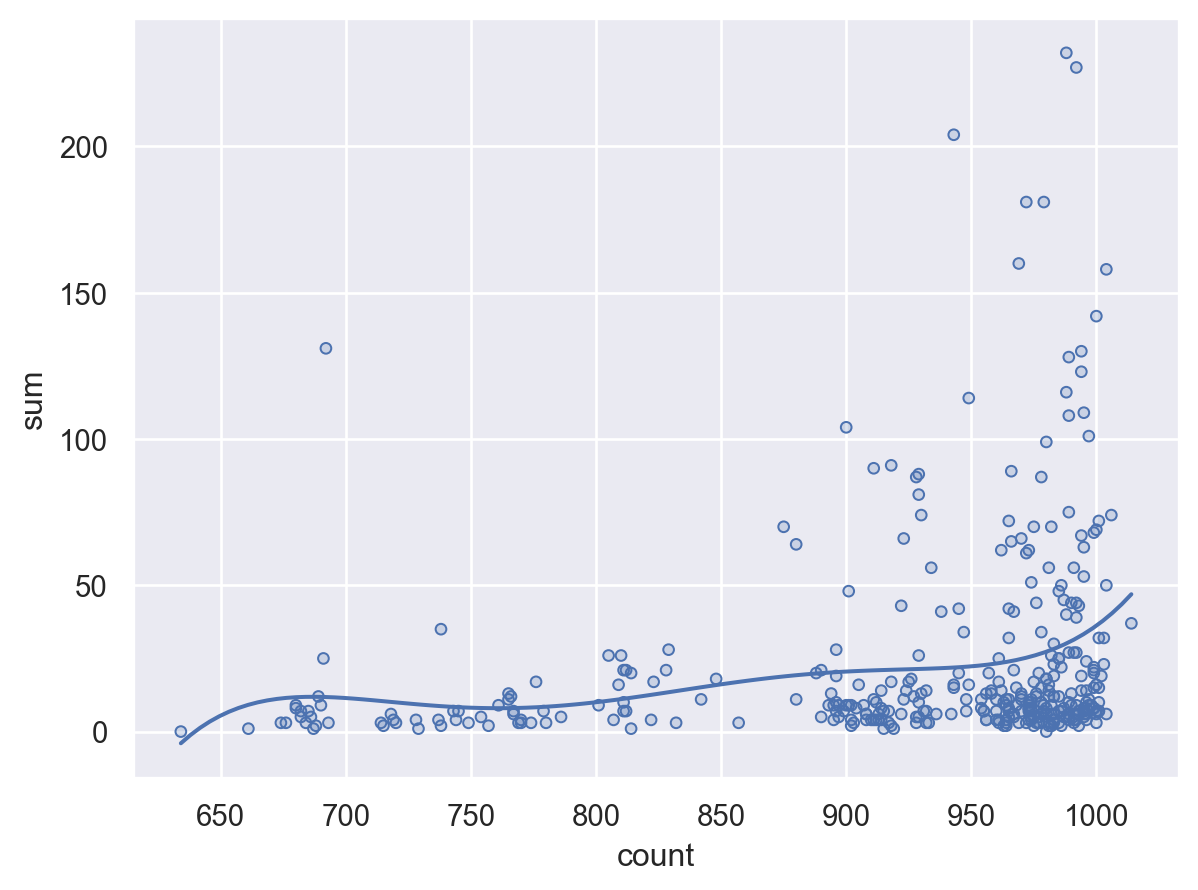

In [24]:
(
    so.Plot(cancelled_per_day.query('sum < 300'), x='count', y='sum')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

In [38]:
# 지연된 항공기가 많을수록 결항비율도 큰가? 지연된 비행기가 많으면 뒤에 출발하는 항공편은 결항...

def get_delayed_positive(g):
    return pd.Series([
        g["cancelled"].mean(),
        g.query('dep_delay > 0')["dep_delay"].mean(),
        g.query('arr_delay > 0')["arr_delay"].mean(),
    ], index=["cancelled_prop", "avg_dep_delay", "avg_arr_delay"])

cancelled_and_delays = (
    flights.assign(
        cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna())
    .groupby(["month", "day"])
    .apply(get_delayed_positive)
)

cancelled_and_delays

           cancelled_prop  avg_dep_delay  avg_arr_delay
month day                                              
1     1              0.01          32.66          32.48
      2              0.02          32.63          32.03
      3              0.02          28.50          27.66
...                   ...            ...            ...
12    29             0.02          42.81          47.26
      30             0.02          29.91          31.24
      31             0.02          26.27          24.46

[365 rows x 3 columns]

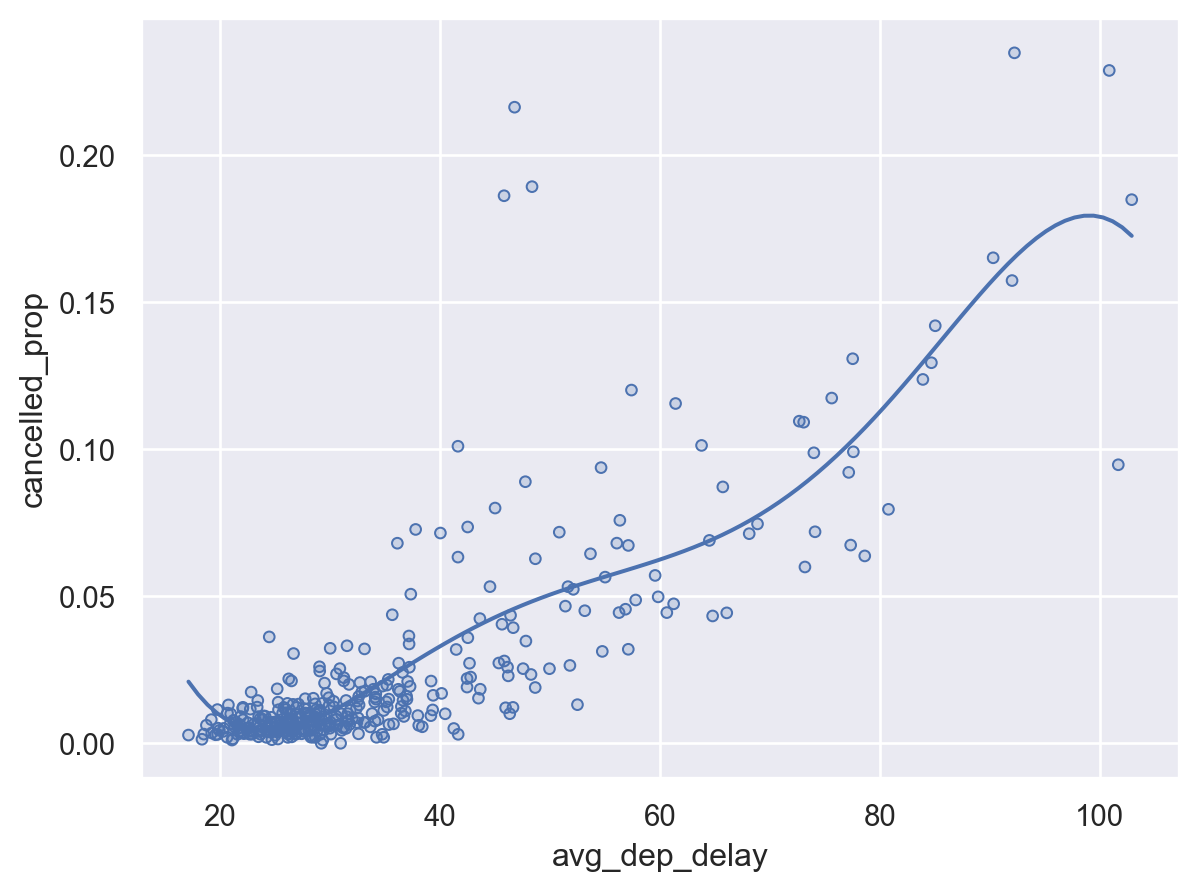

In [41]:
(
    so.Plot(cancelled_and_delays.query('cancelled_prop < .3'), x='avg_dep_delay', y='cancelled_prop')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

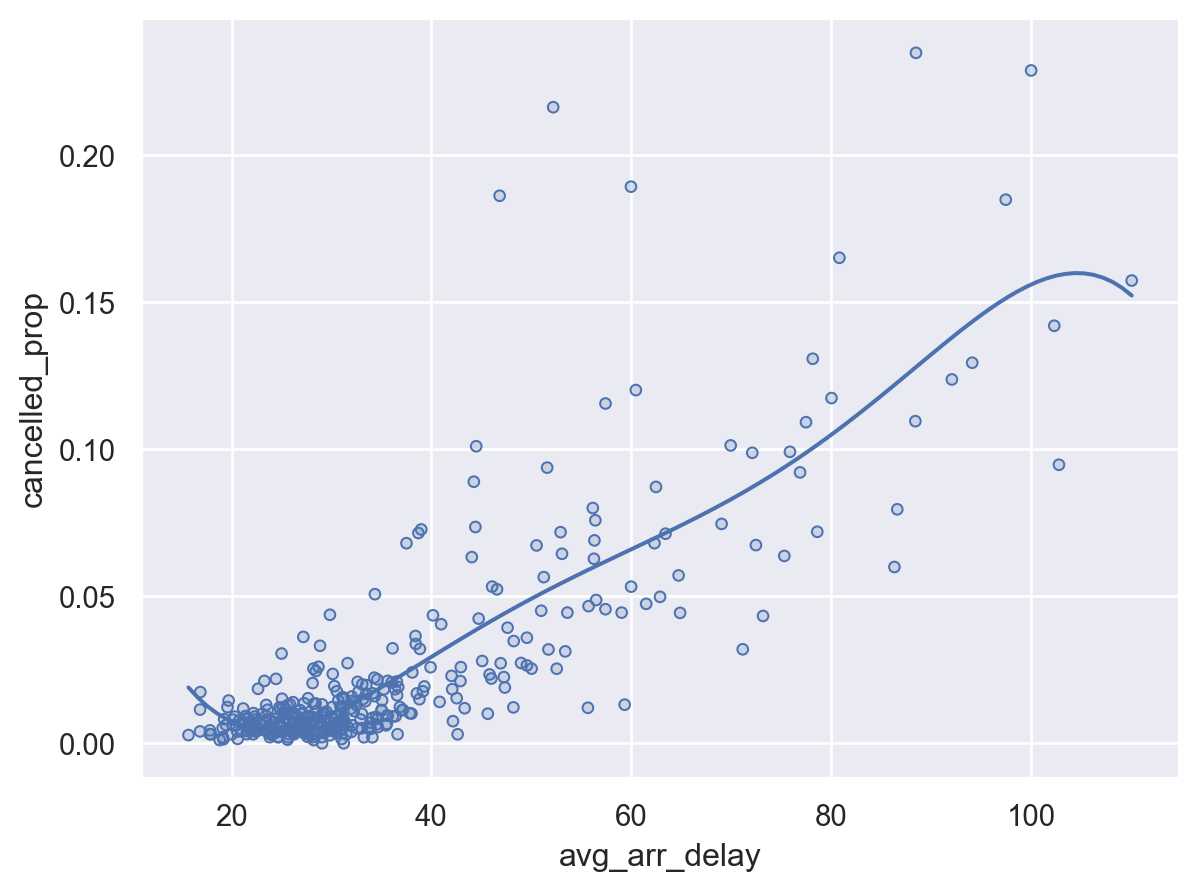

In [42]:
(
    so.Plot(cancelled_and_delays.query('cancelled_prop < .3'), x='avg_arr_delay', y='cancelled_prop')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

### 3.

In [5]:
# 3. What time of day should you fly if you want to avoid delays as much as possible?
# 도착지연이 가장 적은 시간대는 언제인가?

flights.groupby("sched_dep_time")["arr_delay"].mean().reset_index().sort_values(by="arr_delay", ascending=True).head(7)

     sched_dep_time  arr_delay
102             712     -35.35
56              626     -30.00
3               505     -26.50
992            2208     -26.00
6               516     -25.75
26              555     -25.00
27              557     -23.67

In [6]:
# minus delay는 제외하고 도착지연의 평균을 구한다면,
(
    flights.groupby(["sched_dep_time"])[["arr_delay"]]
    .apply(lambda x: x.query('arr_delay > 0').mean())
    .sort_values(by="arr_delay", ascending=True)
    .head(7)
)

                arr_delay
sched_dep_time           
2133                 1.00
712                  2.00
534                  3.00
1958                 4.00
616                  6.67
919                  6.73
548                  6.78

In [8]:
def get_delayed_positive(g):
    return pd.Series([
        g.query('arr_delay > 0')["arr_delay"].median(),
        g.query('arr_delay > 0')["arr_delay"].count(),
        g["arr_delay"].count()
    ], index=["avg_arr_delay", "n", "n_total"])

time_delay = flights.groupby(["sched_dep_time"]).apply(get_delayed_positive).fillna(0).reset_index()
time_delay

      sched_dep_time  avg_arr_delay      n  n_total
0                106           0.00   0.00     0.00
1                500           7.00  73.00   340.00
2                501           0.00   0.00     1.00
...              ...            ...    ...      ...
1018            2355          12.00  36.00    73.00
1019            2358          18.00  29.00    44.00
1020            2359          18.00 413.00   810.00

[1021 rows x 4 columns]

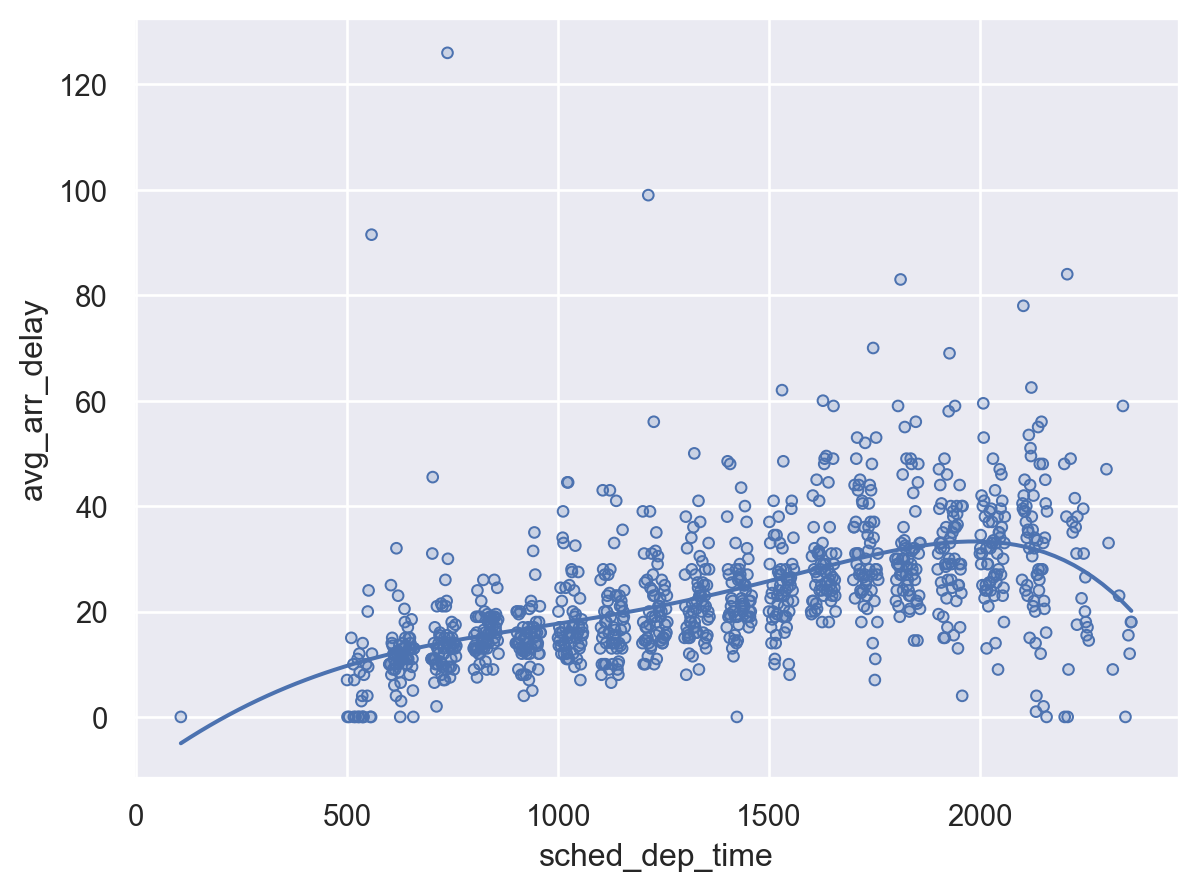

In [9]:
# 시각화해서 살펴보면,
(
    so.Plot(time_delay, x='sched_dep_time', y='avg_arr_delay')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

In [10]:
# 이상치들은 샘플수가 작은가?
time_delay.sort_values(by="avg_arr_delay", ascending=False).head(5)

     sched_dep_time  avg_arr_delay    n  n_total
128             738         126.00 2.00    15.00
404            1214          99.00 6.00    52.00
28              558          91.50 2.00     3.00
991            2207          84.00 3.00     3.00
762            1812          83.00 7.00    14.00

### 4.

In [ ]:
# 4. For each destination, compute the total minutes of delay. For each flight, compute the proportion of the total delay for its destination.

In [19]:
# For each destination, compute the total minutes of delay.
total_delay = flights.groupby("dest")["arr_delay"].sum().reset_index(name="total_delay")
total_delay

    dest  total_delay
0    ABQ      1113.00
1    ACK      1281.00
2    ALB      6018.00
..   ...          ...
102  TVC      1232.00
103  TYS     13912.00
104  XNA      7406.00

[105 rows x 2 columns]

In [20]:
# For each flight, compute the proportion of the total delay for its destination.
# Merge를 이용하면,
(
    flights.merge(total_delay, on="dest")
    .assign(prop_delay = lambda x: x.arr_delay / x.total_delay)
    .sort_values(["year", "month", "day", "hour", "minute"])
    .head(3)
)


      year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
0     2013      1    1    517.00             515       2.00    830.00  \
1     2013      1    1    533.00             529       4.00    850.00   
7198  2013      1    1    542.00             540       2.00    923.00   

      sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
0                819      11.00      UA    1545  N14228    EWR  IAH    227.00  \
1                830      20.00      UA    1714  N24211    LGA  IAH    227.00   
7198             850      33.00      AA    1141  N619AA    JFK  MIA    160.00   

      distance  hour  minute  total_delay  prop_delay  
0         1400     5      15     30046.00        0.00  
1         1416     5      29     30046.00        0.00  
7198      1089     5      40      3467.00        0.01  

In [ ]:
# transform을 이용하면,
flights["total_delay"] = flights.groupby("dest")["arr_delay"].transform("sum")
flights.head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
0  2013      1    1    517.00             515       2.00    830.00  \
1  2013      1    1    533.00             529       4.00    850.00   
2  2013      1    1    542.00             540       2.00    923.00   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
0             819      11.00      UA    1545  N14228    EWR  IAH    227.00  \
1             830      20.00      UA    1714  N24211    LGA  IAH    227.00   
2             850      33.00      AA    1141  N619AA    JFK  MIA    160.00   

   distance  hour  minute  total_delay  
0      1400     5      15     30046.00  
1      1416     5      29     30046.00  
2      1089     5      40      3467.00  

In [ ]:
flights.assign(prop_delay = lambda x: x.arr_delay / x.total_delay).head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
0  2013      1    1    517.00             515       2.00    830.00  \
1  2013      1    1    533.00             529       4.00    850.00   
2  2013      1    1    542.00             540       2.00    923.00   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time   
0             819      11.00      UA    1545  N14228    EWR  IAH    227.00  \
1             830      20.00      UA    1714  N24211    LGA  IAH    227.00   
2             850      33.00      AA    1141  N619AA    JFK  MIA    160.00   

   distance  hour  minute  total_delay  prop_delay  
0      1400     5      15     30046.00        0.00  
1      1416     5      29     30046.00        0.00  
2      1089     5      40      3467.00        0.01  

### 5.

In [297]:
# 5. Find all destinations that are flown by at least two carriers. Use that information to rank the carriers.

flights.groupby("dest")["carrier"].nunique()

dest
ABQ    1
ACK    1
ALB    1
      ..
TVC    2
TYS    2
XNA    2
Name: carrier, Length: 105, dtype: int64

In [296]:
dest_carrier = flights.copy()
dest_carrier["carrier_n"] = flights.groupby("dest")["carrier"].transform("nunique")
dest_carrier = dest_carrier.query('carrier_n >= 2')

In [304]:
(
    dest_carrier.groupby("carrier")["dest"]
    .nunique()
    .reset_index(name="n_dest")
    .assign(rank = lambda x: x.n_dest.rank(ascending=False))
    .sort_values("rank")
)

   carrier  n_dest  rank
5       EV      51  1.00
0       9E      48  2.00
11      UA      42  3.00
..     ...     ...   ...
2       AS       1 15.00
6       F9       1 15.00
8       HA       1 15.00

[16 rows x 3 columns]

## C.

### 1.

In [ ]:
# 1. Which carrier has the worst arrival delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not?

In [37]:
# Total delay by carrier within each origin, dest
arr_delay = flights.groupby(["carrier", "origin", "dest"])["arr_delay"].agg(["mean", "count"]).rename(columns={"mean": "arr_delay", "count": "flights"}).reset_index()

arr_delay

    carrier origin dest  arr_delay  flights
0        9E    EWR  ATL      -6.25        4
1        9E    EWR  CVG       1.40      796
2        9E    EWR  DTW       2.54      220
..      ...    ...  ...        ...      ...
436      YV    LGA  CLT      12.86      258
437      YV    LGA  IAD      18.92      278
438      YV    LGA  PHL     -14.38        8

[439 rows x 5 columns]

In [41]:
# Total delay within each origin dest
arr_delay_total = arr_delay.groupby(["origin", "dest"])[["arr_delay", "flights"]].sum().reset_index().rename(columns={"arr_delay": "arr_delay_total", "flights": "flights_total"})

arr_delay_total

    origin dest  arr_delay_total  flights_total
0      EWR  ALB            14.40            418
1      EWR  ANC            -2.50              8
2      EWR  ATL            33.79           4876
..     ...  ...              ...            ...
221    LGA  TVC            31.75             73
222    LGA  TYS             3.89            265
223    LGA  XNA           125.96            709

[224 rows x 4 columns]

In [44]:
# using `transform` instead of `merge`
arr_delay[["arr_delay_total", "flights_total"]] = arr_delay.groupby(["origin", "dest"])[["arr_delay", "flights"]].transform("sum")

In [45]:
arr_delay

    carrier origin dest  arr_delay  flights  arr_delay_total  flights_total
0        9E    EWR  ATL      -6.25        4            33.79           4876
1        9E    EWR  CVG       1.40      796            22.60           2513
2        9E    EWR  DTW       2.54      220            88.35           3009
..      ...    ...  ...        ...      ...              ...            ...
436      YV    LGA  CLT      12.86      258            45.37           5961
437      YV    LGA  IAD      18.92      278            30.48           1659
438      YV    LGA  PHL     -14.38        8            -8.32            598

[439 rows x 7 columns]

In [47]:
# relative delay: average delay of each carrier - average delay of other carriers
arr_delay_relative = arr_delay.assign(
    arr_delay_others_mean = lambda x: (x.arr_delay_total - x.arr_delay) / (x.flights_total - x.flights),
    arr_delay_mean = lambda x: x.arr_delay / x.flights,
    arr_delay_diff = lambda x: x.arr_delay_mean - x.arr_delay_others_mean
)

arr_delay_relative

    carrier origin dest  arr_delay  flights  arr_delay_total  flights_total  \
0        9E    EWR  ATL      -6.25        4            33.79           4876   
1        9E    EWR  CVG       1.40      796            22.60           2513   
2        9E    EWR  DTW       2.54      220            88.35           3009   
..      ...    ...  ...        ...      ...              ...            ...   
436      YV    LGA  CLT      12.86      258            45.37           5961   
437      YV    LGA  IAD      18.92      278            30.48           1659   
438      YV    LGA  PHL     -14.38        8            -8.32            598   

     arr_delay_others_mean  arr_delay_mean  arr_delay_diff  
0                     0.01           -1.56           -1.57  
1                     0.01            0.00           -0.01  
2                     0.03            0.01           -0.02  
..                     ...             ...             ...  
436                   0.01            0.05            0.04  
4

In [48]:
arr_delay_relative.groupby("carrier")["arr_delay_diff"].mean().sort_values(ascending=False)

carrier
OO   28.79
EV    5.35
VX    1.83
      ... 
DL   -1.72
MQ   -5.25
HA     NaN
Name: arr_delay_diff, Length: 16, dtype: float64

### 2.

In [8]:
# 2. Which plane (tailnum) has the worst on-time record?
## on-time: 늦게 도착하지 않은 항공편의 횟수로 이해

(
    flights[flights["tailnum"].notna()].assign(
        on_time = lambda x: x.arr_delay <= 0 & x.arr_time.notna())
    .groupby("tailnum")["on_time"]
    .agg(["mean", "count"])
    .sort_values("mean")
)

         mean  count
tailnum             
N768SK    0.0      1
N840MH    0.0      1
N838AW    0.0      2
...       ...    ...
N357SW    1.0      8
N524AS    1.0      9
N834MH    1.0      1

[4043 rows x 2 columns]

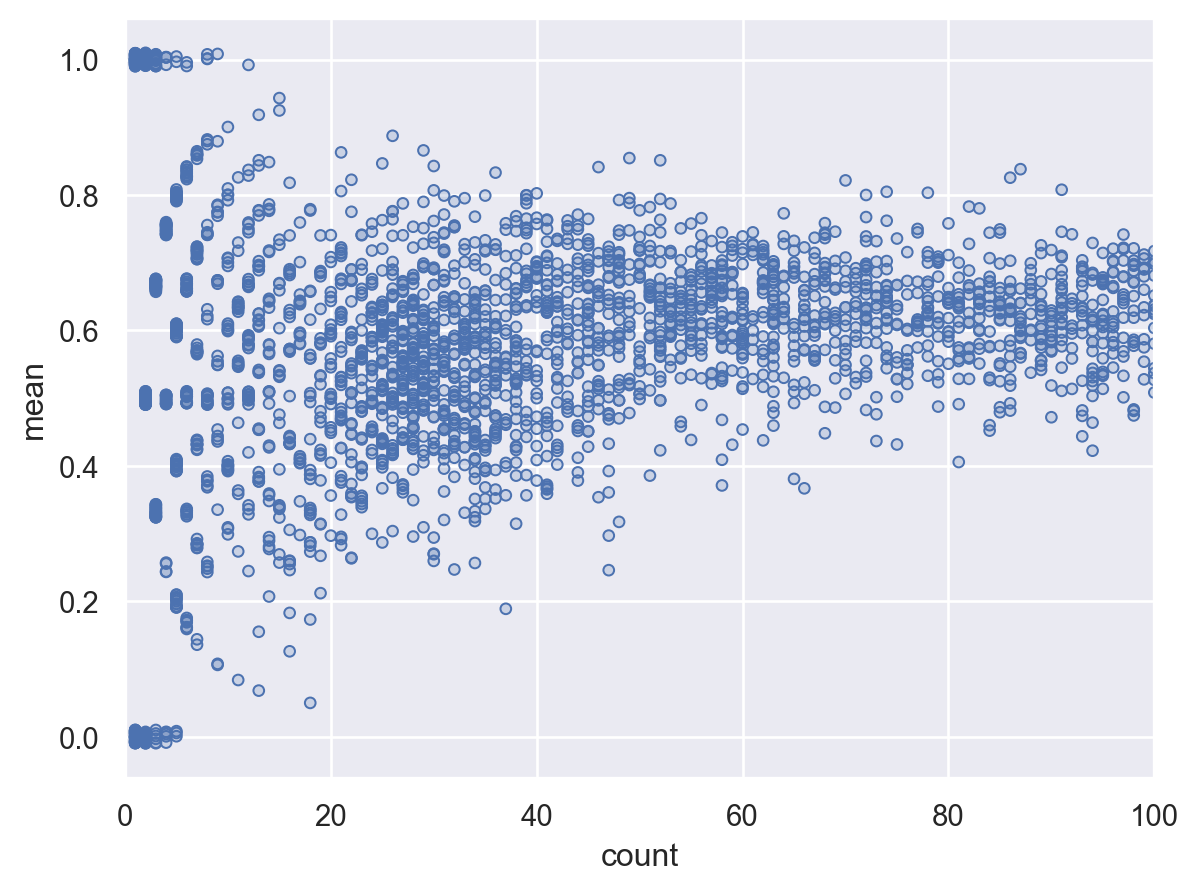

In [29]:
# 극히 작은 운항횟수를 가진 비행기가 많음... : 제거

on_time = (
    flights[flights["tailnum"].notna()].assign(
        on_time = lambda x: x.arr_delay <= 0 & x.arr_time.notna())
    .groupby("tailnum")["on_time"]
    .agg(["mean", "count"])
    .sort_values("mean")
)

(
    so.Plot(on_time, x='count', y='mean')
    .add(so.Dots(), so.Jitter(y=0.02))
    .limit(x=(0, 100))
)

In [32]:
on_time.query('count > 20').nlargest(3, "mean")

         mean  count
tailnum             
N382HA   0.88     26
N423AS   0.86     29
N5EJAA   0.86     21

In [33]:
## on-time: 도착 delay의 길이로 파악하는 경우

flights.groupby("tailnum")["arr_delay"].agg(["mean", "count"]).query('count > 20').nlargest(3, "mean")

         mean  count
tailnum             
N203FR  59.12     41
N645MQ  51.00     24
N956AT  47.65     34

### 3.

In [ ]:
# 3. Look at each destination. Can you find flights that are suspiciously fast? (i.e. flights that represent a potential data entry error).

In [5]:
flights = flights.assign(
    mph = lambda x: x.distance / x.air_time * 60
)

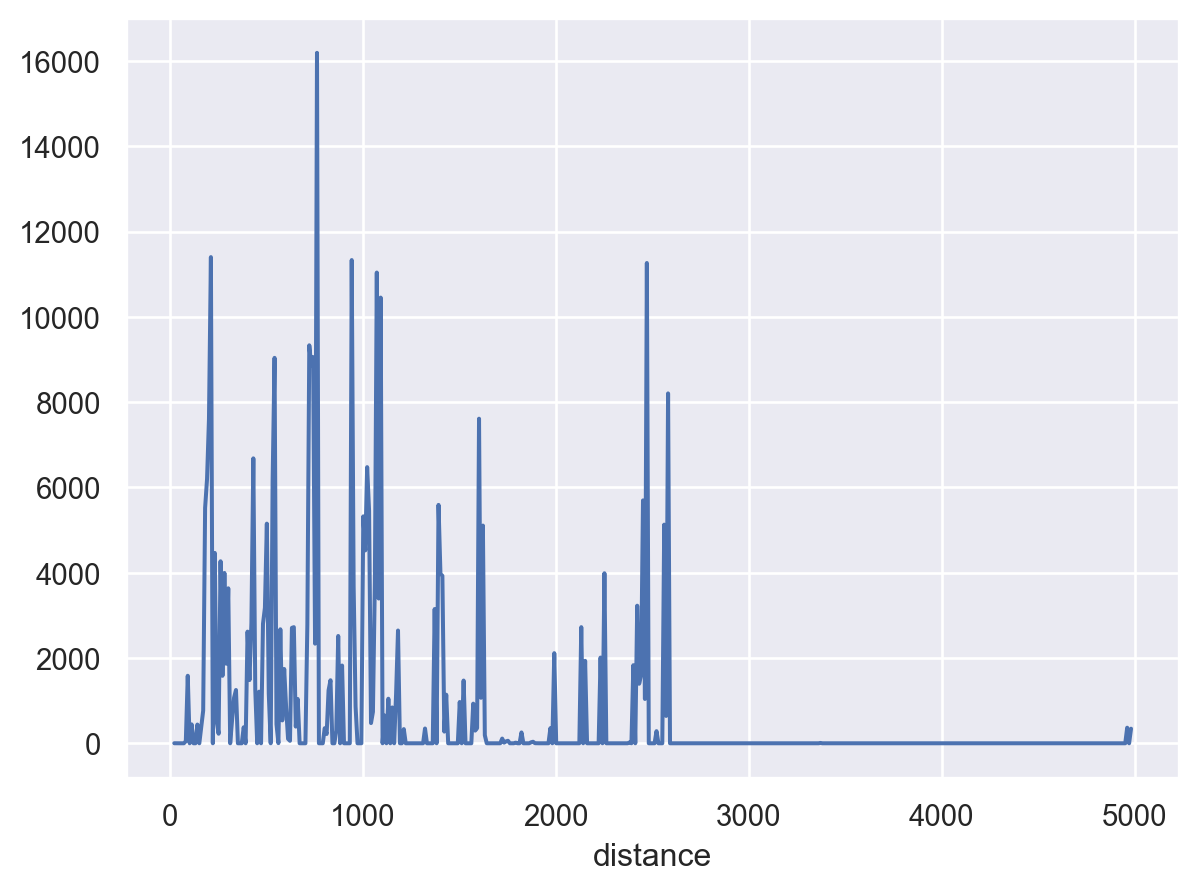

In [7]:
(
    so.Plot(flights, x='distance')
    .add(so.Line(), so.Hist(binwidth=10))
)

In [18]:
# 같은 루트를 비행하는 항공편들 안에서 특이점이라면 의심해 볼만함...

standardized = (
    flights.groupby(["origin", "dest"])["air_time"]
    .agg([("air_time_mean", "mean"), ("air_time_std", "std"), ("n", "count")])
    .reset_index()
)
standardized

    origin dest  air_time_mean  air_time_std     n
0      EWR  ALB          31.79          3.08   418
1      EWR  ANC         413.12         14.67     8
2      EWR  ATL         111.99          9.99  4876
..     ...  ...            ...           ...   ...
221    LGA  TVC          94.60          6.49    73
222    LGA  TYS          97.82          8.52   265
223    LGA  XNA         173.17         15.91   709

[224 rows x 5 columns]

In [16]:
def normalize(x):
    return (x - x.mean()) / x.std()

standardized_flights = flights.copy()
standardized_flights["air_time_z"] = flights.groupby(["origin", "dest"])["air_time"].transform(normalize)

In [31]:
standardized_flights.nlargest(5, "air_time_z")

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
237716  2013      6   17   1652.00            1700      -8.00   1856.00  \
244468  2013      6   24   1932.00            1920      12.00   2228.00   
309910  2013      9    1   2237.00            1711     326.00     41.00   
230885  2013      6   10   1356.00            1300      56.00   1646.00   
248839  2013      6   29    755.00             800      -5.00   1035.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
237716            1815      41.00      US    2136  N967UW    LGA  BOS  \
244468            2047     101.00      UA    1703  N37255    EWR  BOS   
309910            1851     350.00      B6    1516  N346JB    JFK  SYR   
230885            1414     152.00      US    2175  N745VJ    LGA  DCA   
248839             909      86.00      B6    1491  N328JB    JFK  ACK   

        air_time  distance  hour  minute    mph  air_time_z  
237716    107.00       184    17       0 103.18 

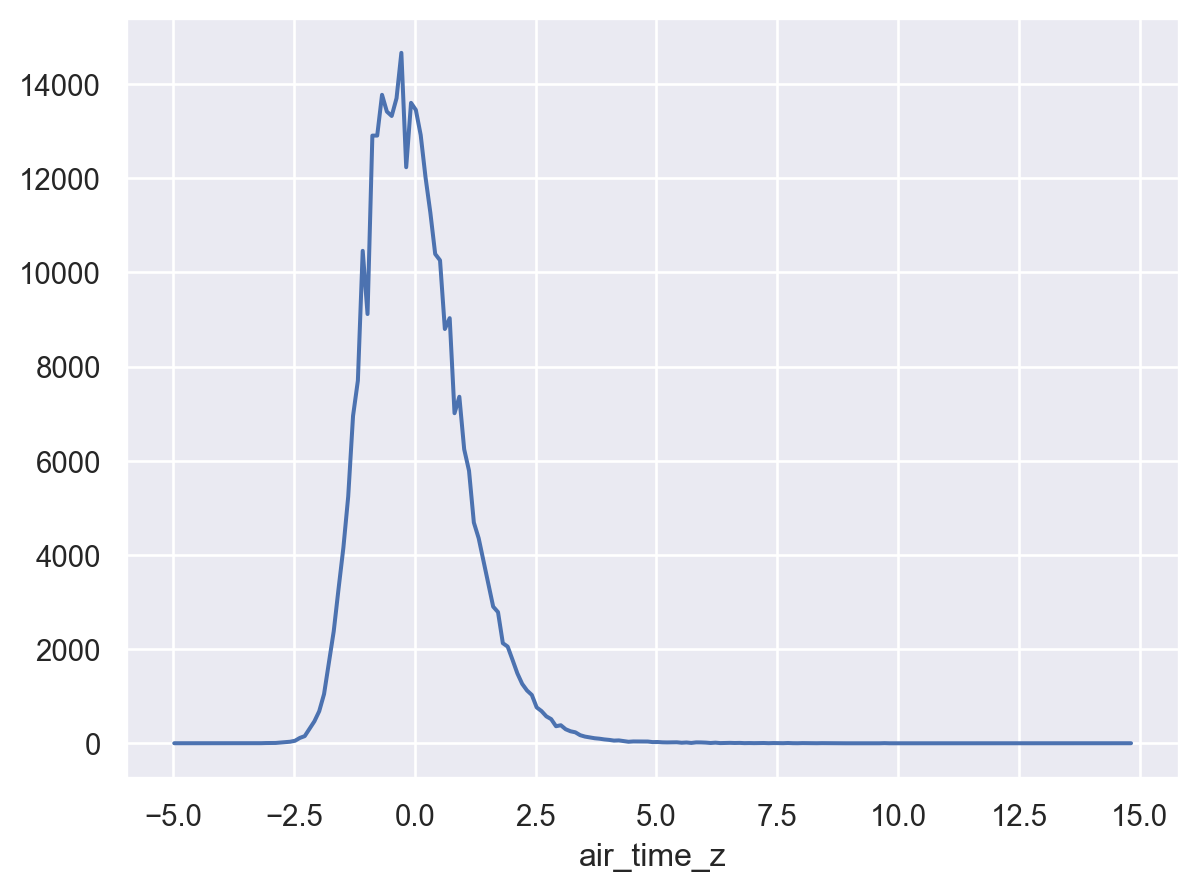

In [29]:
(
    so.Plot(standardized_flights, x='air_time_z')
    .add(so.Line(), so.Hist(binwidth=.1))
)

### 4.

In [79]:
pd.options.display.min_rows = 0
pd.options.display.max_rows = 100

In [74]:
# 4. Compute the air time of a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?

# 비율의 차이
air_time_delayed = flights.copy()
air_time_delayed["air_time_delayed"] = flights.groupby(["origin", "dest"])["air_time"].transform(lambda x: (x - x.min()) / x.min())

air_time_delayed.sort_values("air_time_delayed", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
237716  2013      6   17   1652.00            1700      -8.00   1856.00  \
230885  2013      6   10   1356.00            1300      56.00   1646.00   
248839  2013      6   29    755.00             800      -5.00   1035.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
237716            1815      41.00      US    2136  N967UW    LGA  BOS  \
230885            1414     152.00      US    2175  N745VJ    LGA  DCA   
248839             909      86.00      B6    1491  N328JB    JFK  ACK   

        air_time  distance  hour  minute    mph  air_time_delayed  
237716    107.00       184    17       0 103.18              4.10  
230885    131.00       214    13       0  98.02              3.09  
248839    141.00       199     8       0  84.68              3.03  

In [75]:
# 크기의 차이
air_time_delayed = flights.copy()
air_time_delayed["air_time_delayed"] = flights.groupby(["origin", "dest"])["air_time"].transform(lambda x: x - x.min())

air_time_delayed.sort_values("air_time_delayed", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
276578  2013      7   28   1727.00            1730      -3.00   2242.00  \
76185   2013     11   22   1812.00            1815      -3.00   2302.00   
24032   2013      1   28   1806.00            1700      66.00   2253.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
276578            2110      92.00      DL     841  N703TW    JFK  SFO  \
76185             2146      76.00      DL     426  N178DN    JFK  LAX   
24032             1950     183.00      AA     575  N5DBAA    JFK  EGE   

        air_time  distance  hour  minute    mph  air_time_delayed  
276578    490.00      2586    17      30 316.65            189.00  
76185     440.00      2475    18      15 337.50            165.00  
24032     382.00      1747    17       0 274.40            163.00  

### 5.

In [371]:
# 5. For each plane, count the number of flights before the first delay of greater than 1 hour.

flights_first_delay = flights[flights.arr_delay.notna()][["tailnum", "year", "month", "day", "arr_delay"]].assign(
    delay_1h = lambda x: (x.arr_delay > 60)
).sort_values(["tailnum", "year", "month", "day"])

flights_first_delay

       tailnum  year  month  day  arr_delay  delay_1h
120316  D942DN  2013      2   11      91.00      True
157233  D942DN  2013      3   23      44.00     False
157799  D942DN  2013      3   24       2.00     False
...        ...   ...    ...  ...        ...       ...
107510  N9EAMQ  2013     12   27     -18.00     False
109161  N9EAMQ  2013     12   29      48.00     False
109420  N9EAMQ  2013     12   29      53.00     False

[327346 rows x 6 columns]

In [373]:
(
    flights_first_delay.groupby("tailnum").apply(lambda x: x.delay_1h.cumsum())
    .reset_index(level=0)
    .groupby("tailnum")
    .apply(lambda x: np.sum(x.delay_1h < 1))
    .sort_values(ascending=False)
)


tailnum
N717TW    119
N765US     97
N705TW     97
         ... 
N376AA      0
N378AA      0
D942DN      0
Length: 4037, dtype: int64